<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Jupyter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

# Numerical methods:  9. Initial-value problems
## Runge-Kutta method for system of initial-value equations
----
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany*

In this notebook, we discuss solution strategies for differential eqautions with boundary conditions
defined along **one side**, the group of `initial-value problems`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# load own library
import numerics.change_fonts
numerics.change_fonts.change_fontsize()

Define a trajectory of a mass $m$ subject to **gravity** and **friction** in the $x$-$z$-plane:
$$
\begin{array}{rcl}
 \frac{d u}{dt} & = & - \frac{k}{m} |v| u \\
 \frac{d w}{dt} & = & -g - \frac{k}{m} |v| w \\
 \frac{d x}{dt} & = & u \\
 \frac{d z}{dt} & = & w
\end{array}
$$
Coordinates $(x,0,z)$ [m],
velocities $(u,0,w)$ [m/s],
mass $m$ [kg],
friction $k$ [kg/m],
gravitational acceleration $g$ [m/s$^2$].

We define the right-hand side of the differential equation as function:

In [2]:
def rhs(t,y,k,m,g):
    '''
    #----------------------------------------------------------------------
    # right-hand side function rhs(x)
    #----------------------------------------------------------------------
    '''
    u = y[0]
    w = y[1]
    x = y[2]
    z = y[3]
    vabs = np.sqrt(u**2 + w**2)
    dudt = -k/m*vabs*u
    dwdt = -g-k/m*vabs*w
    dxdt = u
    dzdt = w
    dydt = np.array([dudt,dwdt,dxdt,dzdt]).flatten()
    return dydt

In [3]:
def ivp_rk4_system(rhs,t,y,h,k,m,g):
    """
    (description)
    """
    n = len(y)
    k1 = np.zeros(n); w1 = np.zeros(n)
    k2 = np.zeros(n); w2 = np.zeros(n)
    k3 = np.zeros(n); w3 = np.zeros(n)
    k4 = np.zeros(n); w4 = np.zeros(n)
    ynew = np.zeros(n)
    
    dydt = rhs(t,y,k,m,g)
    for i in range(n):
        k1[i] = h*dydt[i]
        w1[i] = y[i] + k1[i]/2.
        
    dydt = rhs(t+h/2.,w1,k,m,g)
    for i in range(n):
        k2[i] = h*dydt[i]
        w2[i] = y[i] + k2[i]/2.
            
    dydt = rhs(t+h/2.,w2,k,m,g)
    for i in range(n):
        k3[i] = h*dydt[i]
        w3[i] = y[i] + k3[i]
                
    dydt = rhs(t+h,w3,k,m,g)
    for i in range(n):
        k4[i] = h*dydt[i]
        
    for i in range(n):
        ynew[i] = y[i] + 1./6. * (k1[i] + 2*k2[i] + 2*k3[i] + k4[i])
        
    return ynew

Initial values for velocity and position.

In [4]:
yinitial = np.array([20,20,0,0])

Start and end times ($a$, $b$) and number of steps $n$, stepsize $h$.

In [5]:
a = 0.
b = 4.
n = 21
h = (b-a) / float(n-1)

In [6]:
y = np.array(yinitial).reshape(1,4)
print(y)
print(y[0,:])
y = np.vstack((y,2*yinitial))
print(y[1,:])

[[20 20  0  0]]
[20 20  0  0]
[40 40  0  0]


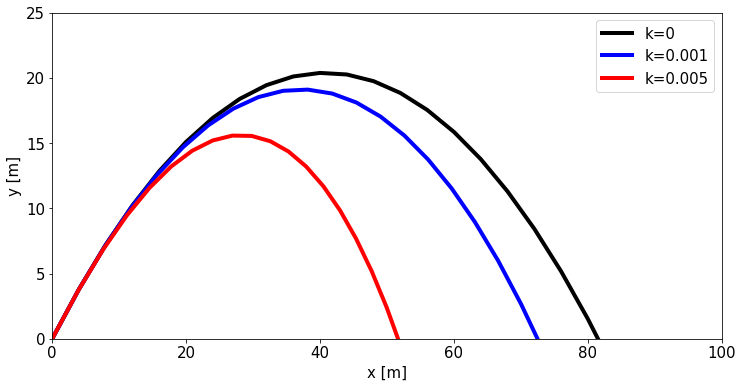

In [8]:
t  = np.array([a])
y1 = np.array(yinitial).reshape(1,4)
y2 = np.array(yinitial).reshape(1,4)
y3 = np.array(yinitial).reshape(1,4)

k = [0,0.001,0.005]
m = 0.5
g = 9.81
for i in range(n):
    t    = np.append(t,[t[i-1]+h])
    ynew = ivp_rk4_system(rhs,t[i-1],y1[i,:],h,k[0],m,g)
    y1 = np.vstack((y1,ynew))
    
for i in range(n):
    t    = np.append(t,[t[i-1]+h])
    ynew = ivp_rk4_system(rhs,t[i-1],y2[i,:],h,k[1],m,g)
    y2 = np.vstack((y2,ynew))
    
for i in range(n):
    t    = np.append(t,[t[i-1]+h])
    ynew = ivp_rk4_system(rhs,t[i-1],y3[i,:],h,k[2],m,g)
    y3 = np.vstack((y3,ynew))

plt.figure(figsize=(12,6))
plt.xlim([0,100])
plt.ylim([0,25])
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.plot(y1[:,2],y1[:,3],linewidth=4,color='black',label='k='+str(k[0]))
plt.plot(y2[:,2],y2[:,3],linewidth=4,color='blue',label='k='+str(k[1]))
plt.plot(y3[:,2],y3[:,3],linewidth=4,color='red',label='k='+str(k[2]))
plt.legend()

----
[next>](Numerics_lab09_dummy.ipynb)